In [1]:
import torch
from transformers import AutoModelForCausalLM
from transformers import AutoTokenizer, EsmForMaskedLM
from tokenizers import Tokenizer
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import pickle

/opt/anaconda3/envs/MachLearn/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from plm_compare_progen2 import *

In [3]:
from protein_data import *

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

model_name = "hugohrban/progen2-small"

# use XL

Using cpu device


In [5]:
model, tokenizer = initialize_progen2(model_name)

In [6]:
df_prot = pd.read_csv('/Users/johnhutchens/Desktop/Practicum/Data/pbd_data_seq_long.csv')

In [7]:
seq_list = list(df_prot['sequence'])

In [8]:
pg_pbd_long_matrix_dict = seq_matrix_dict_pg2(seq_list[:100], model, tokenizer)

In [11]:
m = pg_pbd_long_matrix_dict[1]['log_probs']

In [12]:
m.shape

torch.Size([0, 20])

In [12]:
filename = '/Users/johnhutchens/Desktop/Practicum/Data/pg_pbd_long_matrices.pickle' 

with open(filename, 'wb') as f:
    pickle.dump(pg_pbd_long_matrix_dict, f, protocol=pickle.HIGHEST_PROTOCOL)


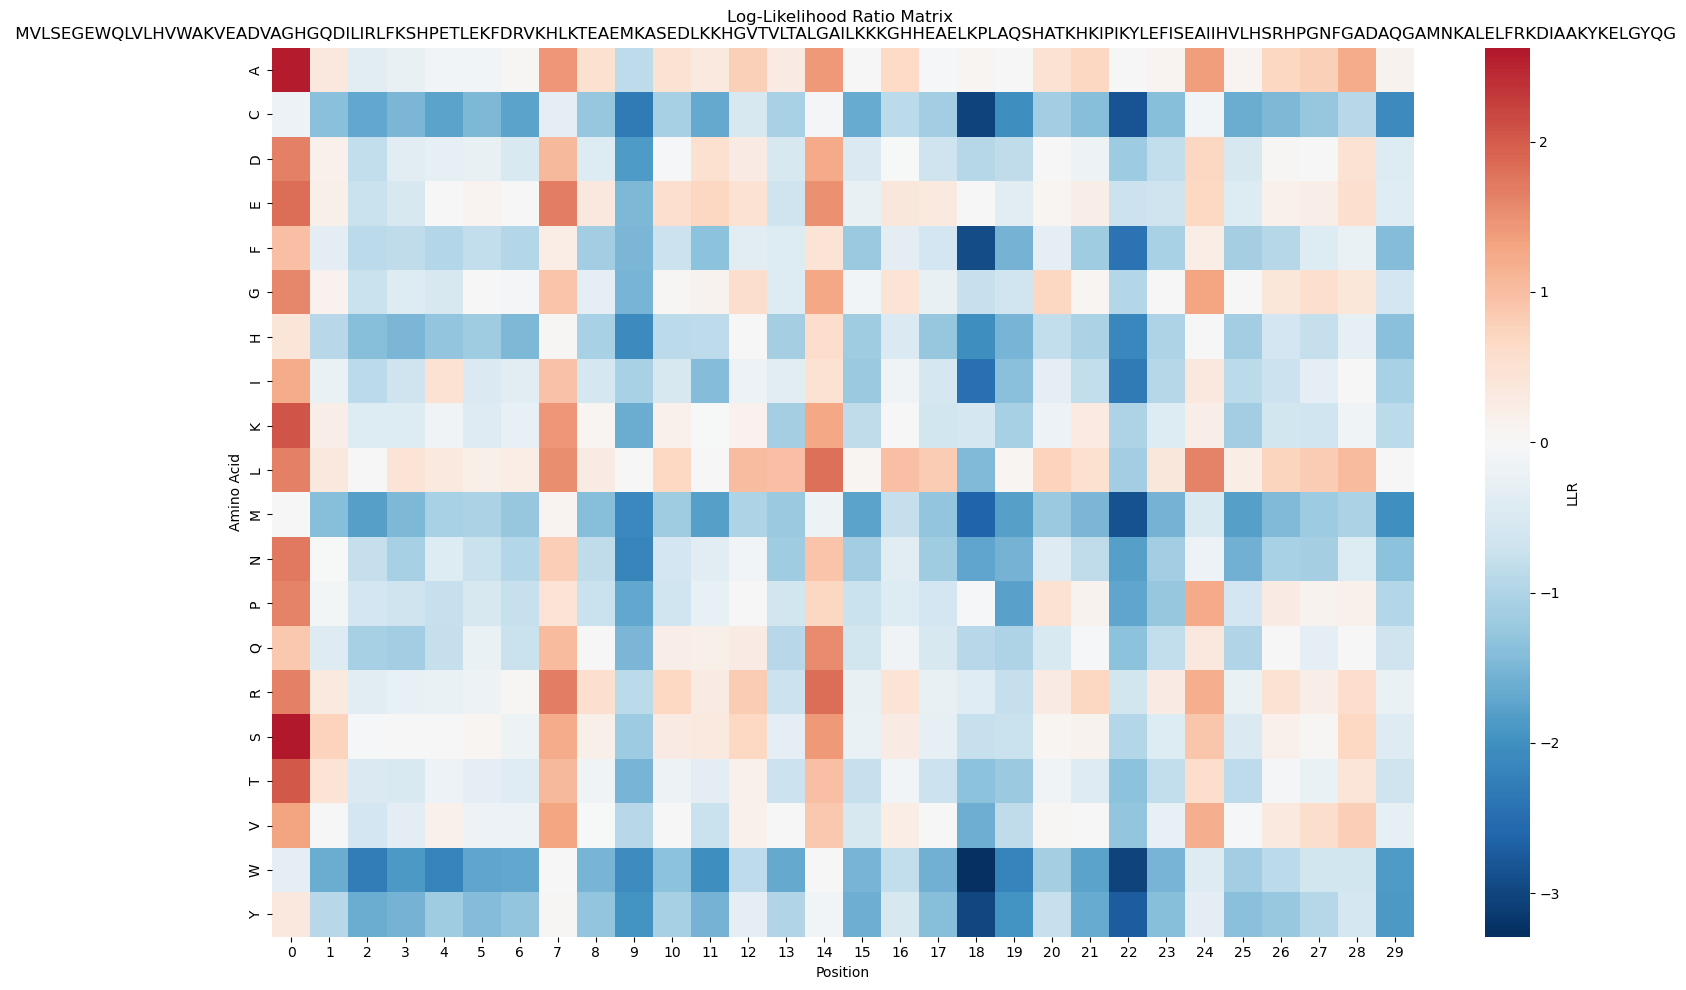

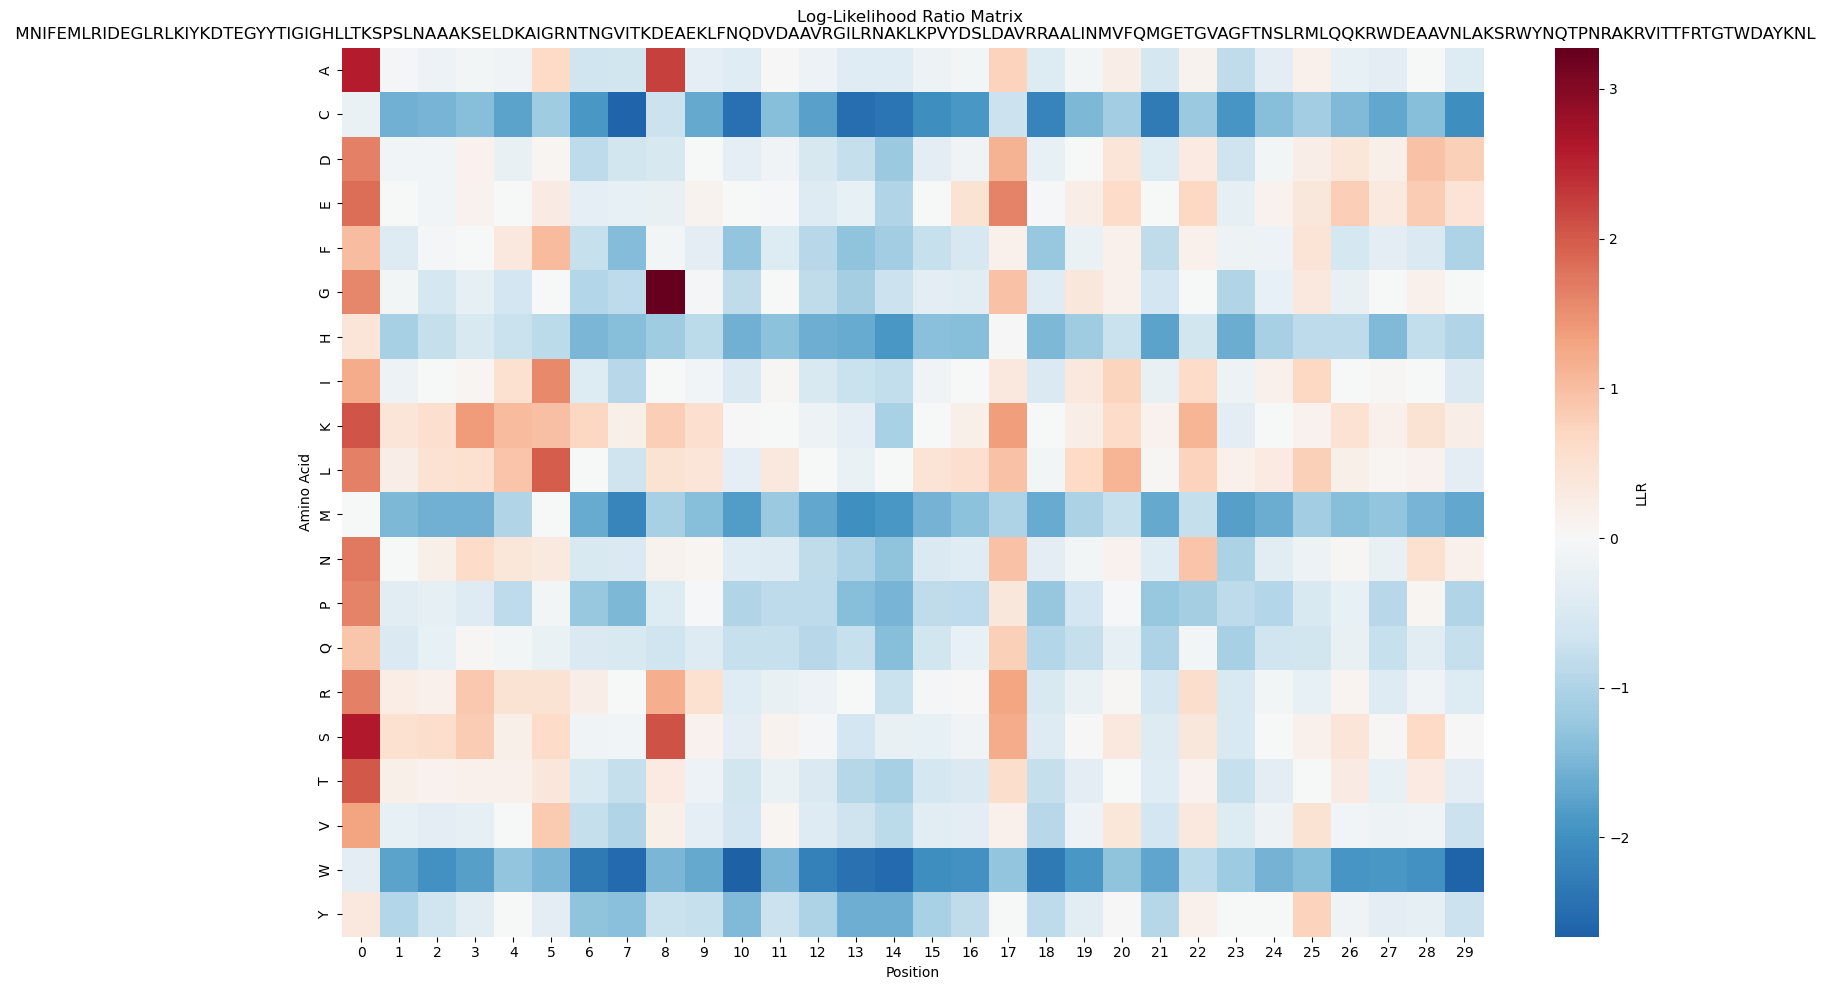

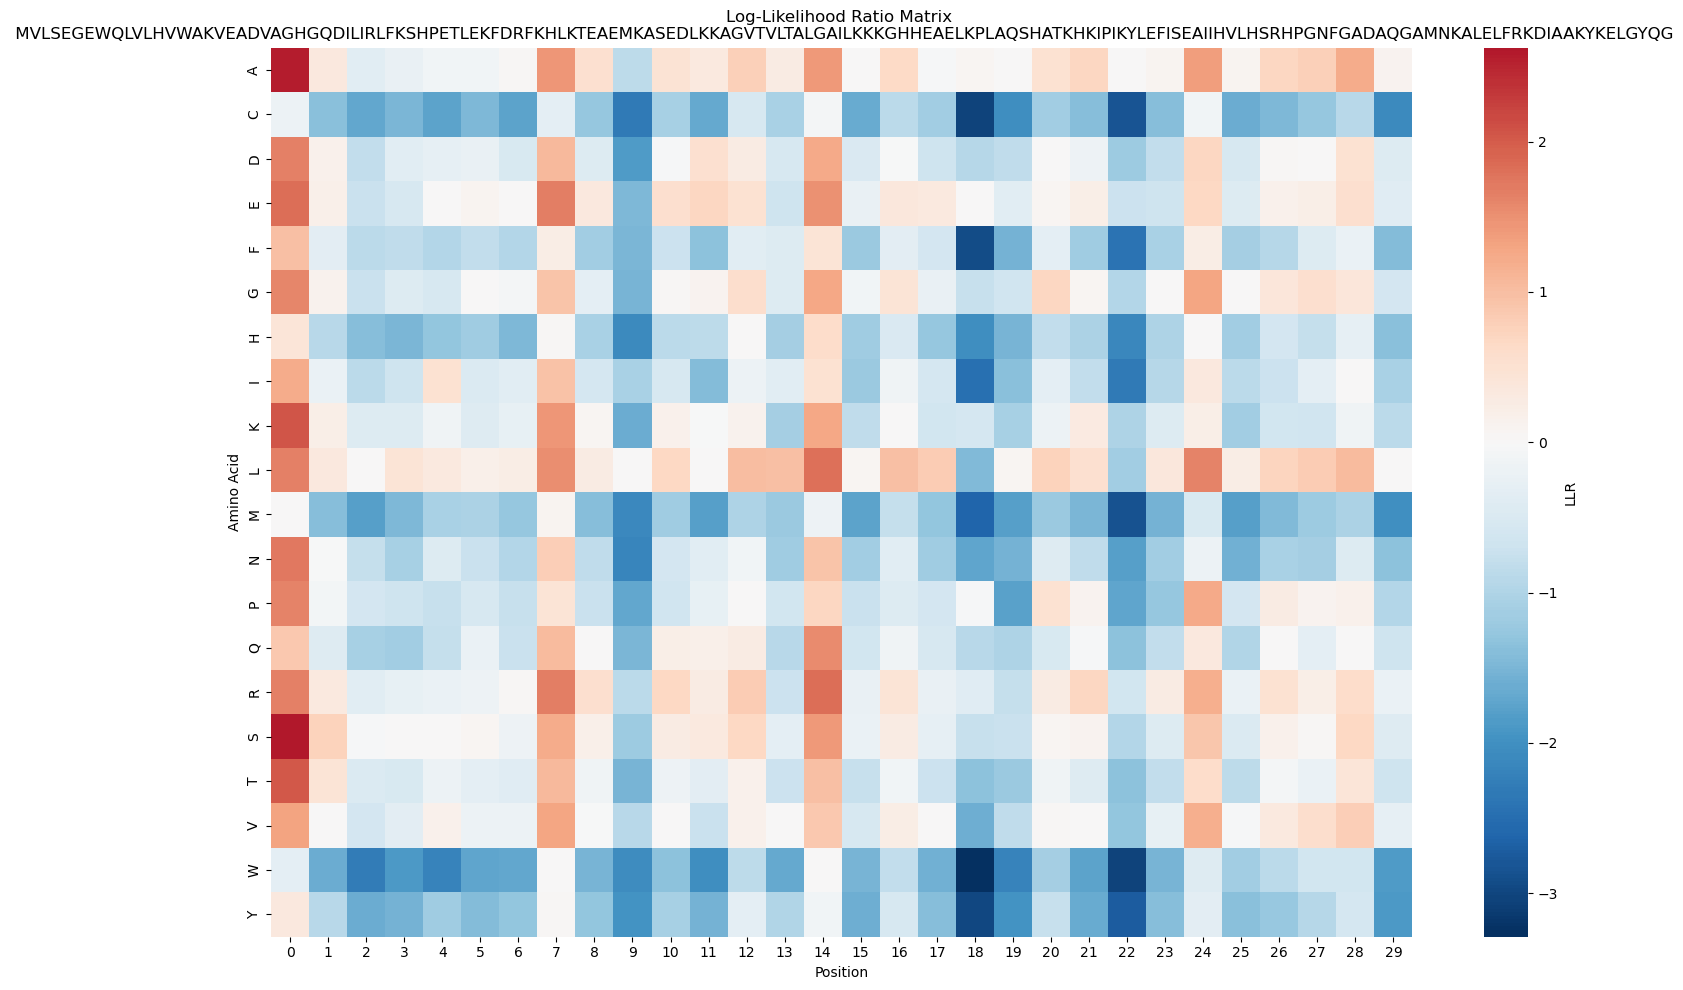

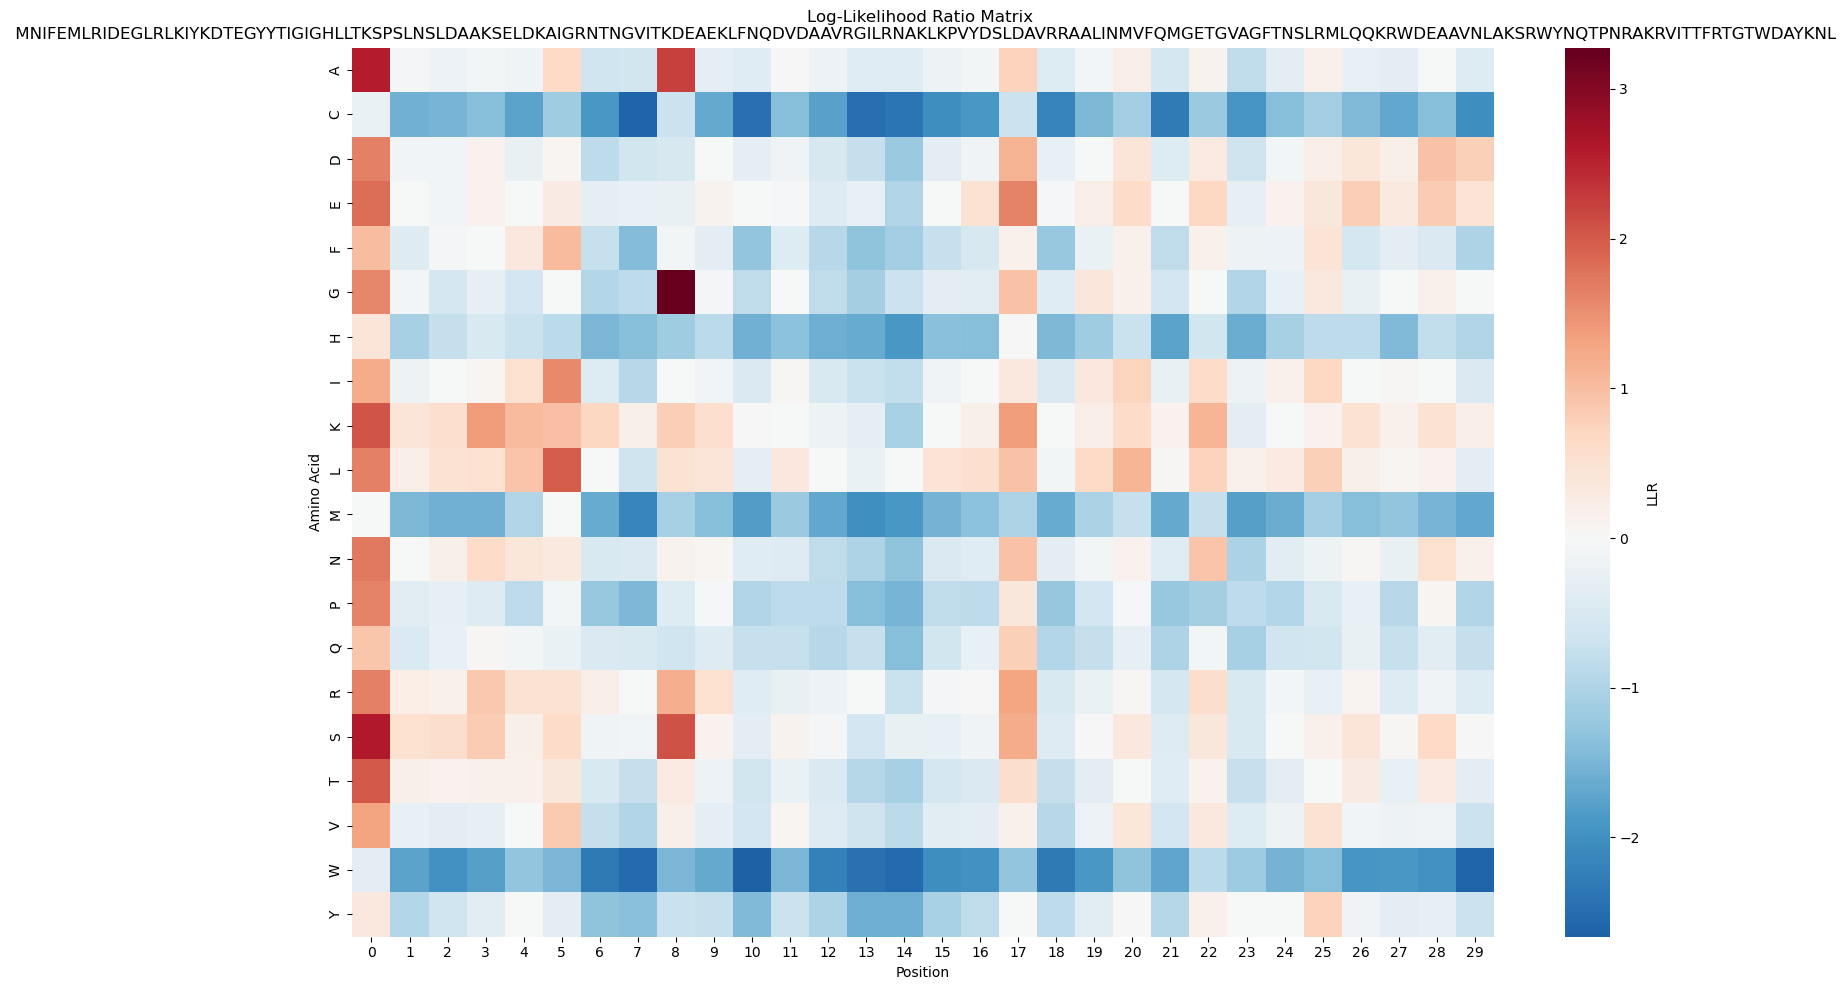

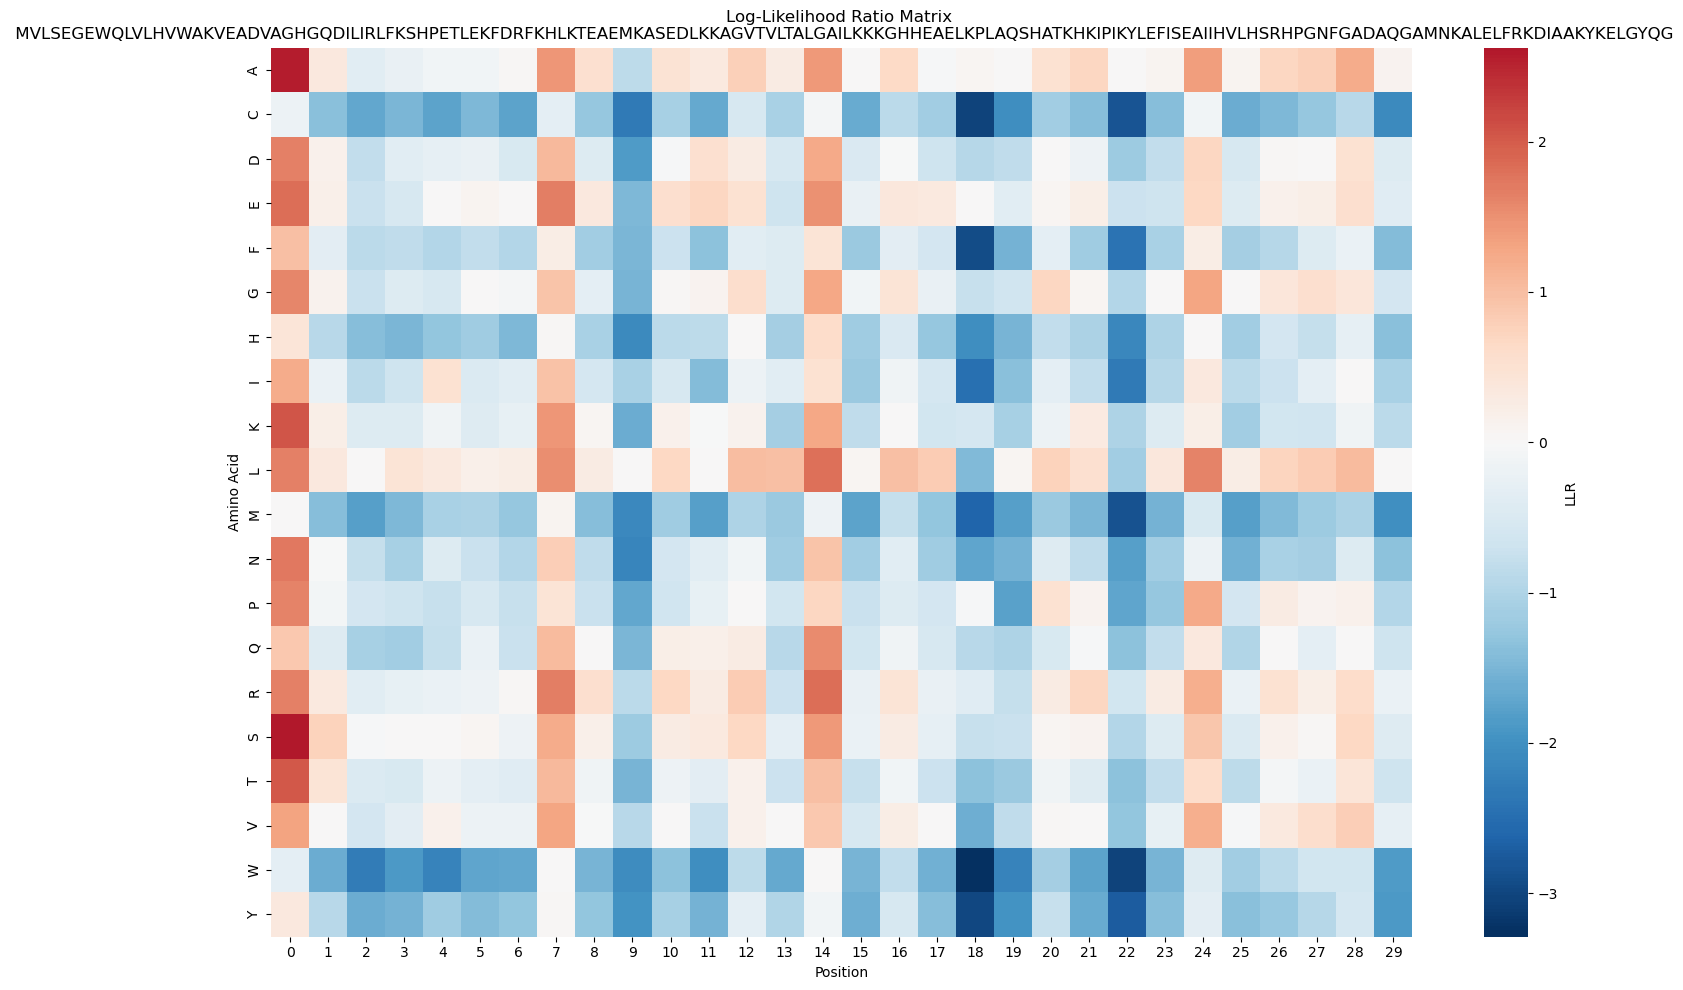

In [12]:
for i in range(0,5):

    llr = pg_pbd_long_matrix_dict[i]["llr_matrix"]
    seq = pg_pbd_long_matrix_dict[i]["sequence"]
    llr_heatmap(llr,positions=range(0,30),sequence=seq)